# Assignment 1

### Name: 

The objective of this assignment is to ensure students are familiar with Python programming language and key toolboxes such as NumPy, Matplotlib, Seaborn, and Pandas, which are commonly used in biomedical applications of machine learning.

## Question 1 (10 pts)

Write a Python script that:

- Prompts the user to enter their name. (2.5 pts)

In [1]:
name = input("Please enter your name:")

- Greets the user with a personalized message. (2.5 pts) 

In [2]:
print(f"Hello, {name}")

Hello, David Wong


- Asks the user to enter two numbers and computes their sum, product, and quotient. (2.5 pts)

In [3]:
# asks for the two numbers seperated by a space for easy parsing
# the choice of a space is arbitrary, but must be consistent
numbers = input("Enter two numbers seperated by a space:")
# numbers are parsed from the input consistent with the previously defined method (space in this case)
n1, n2 = numbers.split(" ")
# the two numbers are converted from strings to floats. 
n1, n2 = float(n1), float(n2)
# the sum, product, and quotient is calculated
sum = n1 + n2
product = n1 * n2
quotient = n1 / n2

- Prints the results. (2.5 pts)

In [4]:
print(f"Sum: {sum}")
print(f"Product: {product}")
print(f"Quotient: {quotient}")

Sum: 9.0
Product: 18.0
Quotient: 2.0


## Question 2 (30 pts)

- Load the Iris dataset from sklearn.datasets using NumPy. (5 pts)

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

* Compute and print the mean, median, and standard deviation of each feature (sepal length, sepal width, petal length, petal width) for each class. (15 pts)
    * Note  this should be done in a loop and nothing should be hard coded.


In [6]:
import numpy as np

# repeat for each class
for class_id, class_name in enumerate(iris.target_names):
    # repeat for each feature
    for feature_id, feature_name in enumerate(iris.feature_names):
        # isolate the values from the data that pertains to the specific class and feature
        values = iris.data[iris.target == class_id, feature_id]
        print(f"{class_name}'s {feature_name} mean is {np.mean(values):.4f}, median is {np.median(values)}, and standard deivation is {np.std(values):.4f}.")

setosa's sepal length (cm) mean is 5.0060, median is 5.0, and standard deivation is 0.3489.
setosa's sepal width (cm) mean is 3.4280, median is 3.4, and standard deivation is 0.3753.
setosa's petal length (cm) mean is 1.4620, median is 1.5, and standard deivation is 0.1719.
setosa's petal width (cm) mean is 0.2460, median is 0.2, and standard deivation is 0.1043.
versicolor's sepal length (cm) mean is 5.9360, median is 5.9, and standard deivation is 0.5110.
versicolor's sepal width (cm) mean is 2.7700, median is 2.8, and standard deivation is 0.3106.
versicolor's petal length (cm) mean is 4.2600, median is 4.35, and standard deivation is 0.4652.
versicolor's petal width (cm) mean is 1.3260, median is 1.3, and standard deivation is 0.1958.
virginica's sepal length (cm) mean is 6.5880, median is 6.5, and standard deivation is 0.6295.
virginica's sepal width (cm) mean is 2.9740, median is 3.0, and standard deivation is 0.3193.
virginica's petal length (cm) mean is 5.5520, median is 5.55, 

- Plot a scatter plot of sepal length vs. sepal width, color-coded by class. (10 pts)
    - Note this should be done in a loop and nothing should be hard coded.


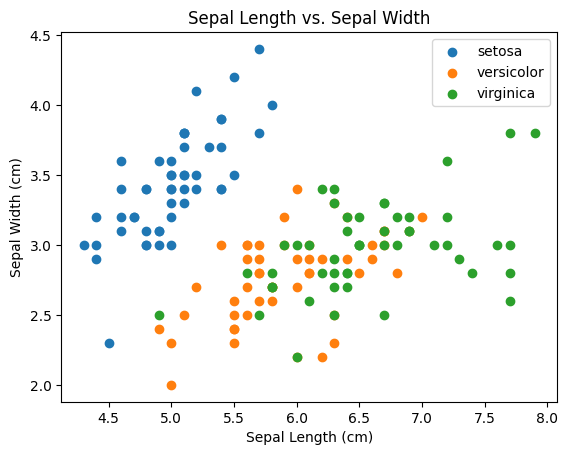

In [7]:
import matplotlib.pyplot as plt

# repeat for each class
for i, label in enumerate(iris.target_names):
    # create a scatterplot of the data only using the data pertaining to
    # the sepal length and width features within this class
    plt.scatter(
        # sepal length
        iris.data[iris.target == i, 0],
        # sepal width
        iris.data[iris.target == i, 1],
        # class label
        label=label,
    )
# add apropriate title, axis labels, and legend to the plot
plt.title("Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

## Question 3 (25 pts)

- Load the Iris dataset using Pandas. (5 pts)

In [8]:
import pandas as pd

# load the iris dataset into a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

- Using Matplotlib, create a histogram of petal length, petal width, sepal length, and sepal width. (10 pts)
    - Plot each one on its own separate axis
    - Note this should be done in a loop and nothing should be hard coded.


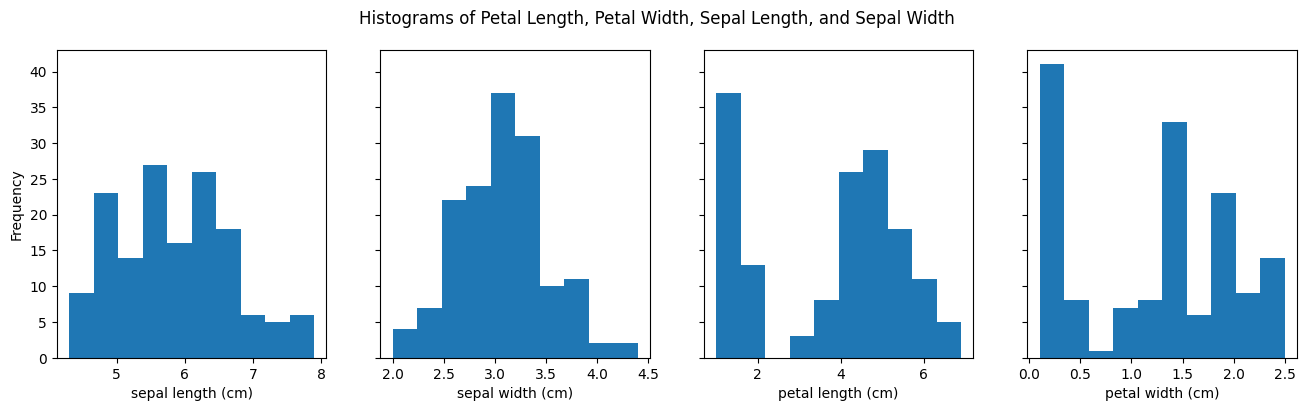

In [9]:
# extract the number of features (which is the number of columns)
num_features = len(df.columns)
# use the number of features to setup the number of subplots/histograms there will be
# here, the figsize is arbitary, but is useful to make the histogram easier to read
# sharey is used as they have the same values on the y-axis and reduces clutter
fig, axes = plt.subplots(1, num_features, figsize=(16,4), sharey=True)

# we repeat for each feature
for i, column in enumerate(df.columns):
    # create a histogram from that feature's data
    axes[i].hist(df[column])
    # add a label to the histogram
    axes[i].set_xlabel(column)
    # if this is the first histogram, add the y-axis labels as they share a y-axis
    if i == 0:
        axes[i].set_ylabel("Frequency")

# create a title for this figure as output the results
fig.suptitle("Histograms of Petal Length, Petal Width, Sepal Length, and Sepal Width")
plt.show()

- Using Seaborn, create a pairplot of the Iris dataset, color-coded by class. (10 pts)
    - Make sure the legend lists the type of flower by name and not by number


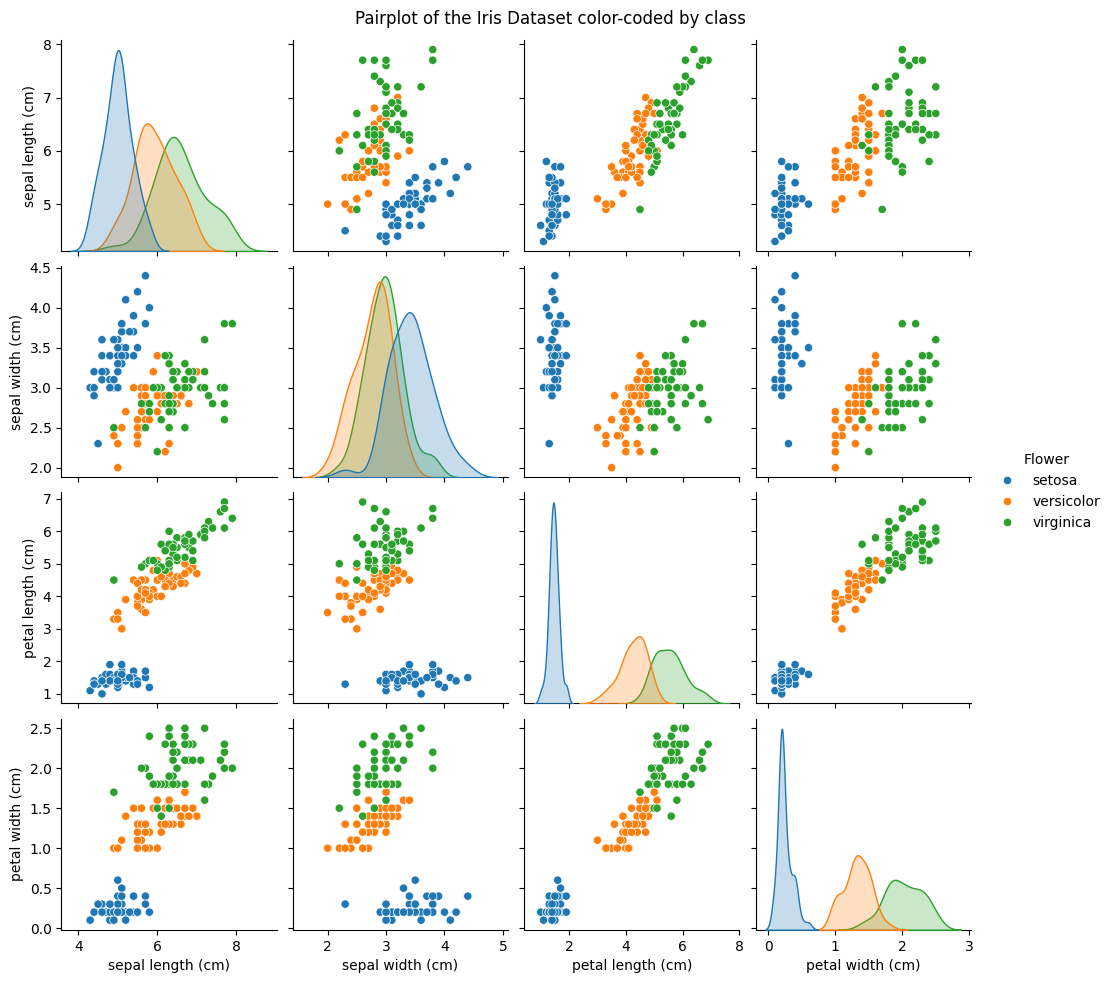

In [10]:
# add the flower name into the dataframe so that it can be used as a label
df['Flower'] = [iris.target_names[i] for i in iris.target]

import seaborn as sns

# create a pairplot while specifying that the 'Flower' column will be used as labels
sns_plot = sns.pairplot(df, hue="Flower")
# add a title above the pairplot
sns_plot.figure.suptitle("Pairplot of the Iris Dataset color-coded by class")
sns_plot.figure.subplots_adjust(top=0.95)

## Question 4 (20 pts)
Load the Breast Cancer Wisconsin (Diagnostic) dataset from the datasets folder on Canvas (breastcancer_tumor_classification.csv). Do not hardcode the path when you read the csv file. Rather have the path as a separate variable that can easily be changed. This will help the graders grade your assignment. 


In [11]:
import os
# this assumes that there is only one csv file and that it is in the same directory as this notebook

# read all of the csv files within the current directory and save them
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
# load the first csv file into a pandas dataframe
df = pd.read_csv(csv_files[0])

- Display the first 5 rows of the dataset. (5 pts)

In [12]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Check for missing values and handle them appropriately. (5 pts)

In [13]:
# upon inspection, there is a column with the word "unnamed" that contains many null values
# thus, this column will be removed if present in the csv as it is a column that shouldn't be in the dataframe
for col in df.columns:
    if "Unnamed" in col:
        df = df.drop(columns=col)

# if there are any other missing values in a labelled column, we will indicate that there are more missing values
if df.isnull().values.any():
    print("Has missing values")
# otherwise, we will indicate that there are not other missing values
else:
    print("Has no missing values")

Has no missing values


- Drop the 'id' column as it's not relevant for analysis. (5 pts)

In [14]:
df = df.drop(columns='id')

- Encode the 'diagnosis' column to binary labels (Malignant: 1, Benign: 0). (5 pts)

In [15]:
# check to ensure that there are only M and B labels
if np.array_equal(np.sort(df['diagnosis'].unique()),['B','M']):
    # replace the diagnosis column with 1's for M and 0's for B
    df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]
else:
    print("There are more than just malignant and benign diagnosis labels")

- Compute and print the mean, median, and standard deviation of 'radius_mean' for each class (Malignant and Benign). (5 pts)
    - Print each of the mean, median and standard deviation on the same line for each class (e.g. The mean radius mean for malignant is xx.x and for benign is yy.y)
    - Print the values up to 1 decimal place


In [16]:
# split the data between malignant (1) and benign (0)
# only inlcude the 'radius_mean' data for both
mal_df = df[df['diagnosis'] == 1]['radius_mean']
ben_df = df[df['diagnosis'] == 0]['radius_mean']
# compute and output the mean for both classes in one sentence
print(f"The mean radius for malignant is {np.mean(mal_df):.1f} and for benign is {np.mean(ben_df):.1f}")
# compute and output the median for both classes in one sentence
print(f"The median radius for malignant is {np.median(mal_df):.1f} and for benign is {np.median(ben_df):.1f}")
# compute and output the standard deviation for both classes in one sentence
print(f"The standard deviation radius for malignant is {np.std(mal_df):.1f} and for benign is {np.std(ben_df):.1f}")

The mean radius for malignant is 17.5 and for benign is 12.1
The median radius for malignant is 17.3 and for benign is 12.2
The standard deviation radius for malignant is 3.2 and for benign is 1.8


Notes:
* Submit your assignment as this completeda single Jupyter Notebook. Submit the pdf printout of the notebook as well as python noteboook. **You must submit the PDF printout.**
* Make sure you follow the best practices for coding (5 pts)
* Make sure you label all axes and legends (10 pt)
* Collaboration with peers is allowed, but each student must submit their own individual solution.
